In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
from skimage.util import random_noise
import scipy.misc
import cv2 as cv
from skimage.restoration import denoise_tv_chambolle
import bm3d


cv.setUseOptimized(True)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def psnr(img_origin, img_denoised):
    img_origin = img_origin.astype(np.float64)
    img_denoised = img_denoised.astype(np.float64)
    rmse = np.sqrt(np.mean((img_origin - img_denoised)**2))
    if rmse == 0:
        print("Same image!")
    else:
        return 20 * np.log10(255. / rmse)

In [3]:
'''
mean filtering methods
'''
def mean_filter(image, size=7):
    return np.uint8(ndimage.uniform_filter(image, size=(size,size,1), mode='constant', cval=0.0)*255)

In [4]:
'''
median filtering methods
'''
def median_filter(image, size=7):
    return np.uint8(ndimage.median_filter(image, size=(size,size,1), mode='constant', cval=0.0)*255)


In [5]:
'''
TV-L2 variational model solved by the Chambolle-Pock algorithm
'''
def l2TV_cp(b, l):
    x = Variable(b.shape)
    prob = Problem(sum_squares(x - b) + l * norm1(grad(x)))
    prob.solve(solver='pc')
    return x.value
    


In [6]:
'''
TV-L1 variational model solved by the Chambolle-Pock algorithm
'''
def l1TV_cp(b, l):
    x = Variable(b.shape)
    prob = Problem(norm1(x - b) + l* norm1(grad(x)))
    prob.solve(solver='pc')
    return x.value

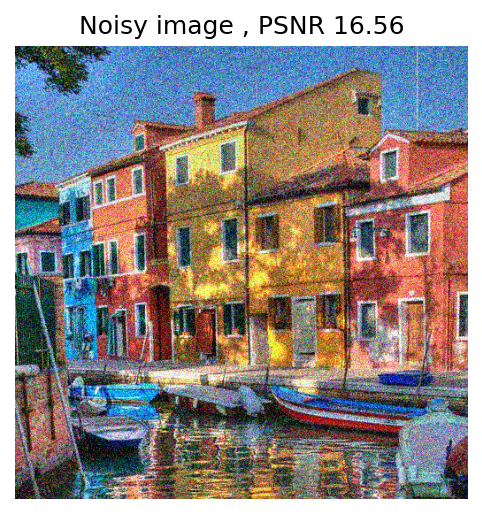

In [7]:
# read image
file = './test.jpg'
# random.seed(42)
image = plt.imread(file)
# image = image.astype(np.float) / np.iinfo(image.dtype).max
image_noisy_G = random_noise(image, mean=0, var=1600/255/255, mode='gaussian', seed=42)
# image_noisy_G = random_noise(image, amount=0.1, mode='s&p', seed=42)
# image_noisy_sp = sp_noise(image,0.1)



fig = plt.figure(dpi=150)
plt.imshow(image_noisy_G, cmap='gray')
plt.title(f'Noisy image , PSNR {psnr(image, np.uint8(image_noisy_G*255)):.2f}')
plt.axis('off')
plt.show()


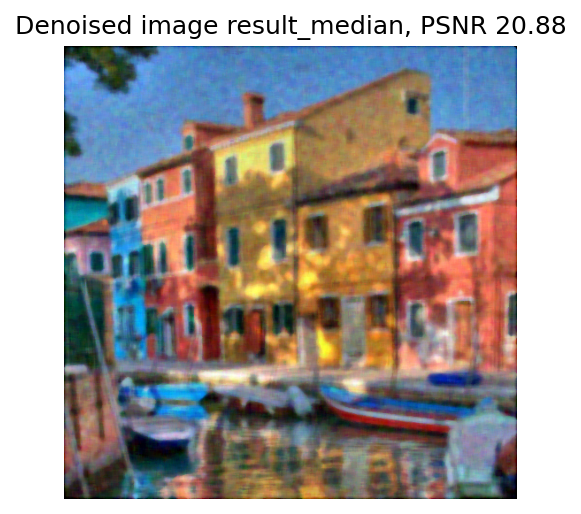

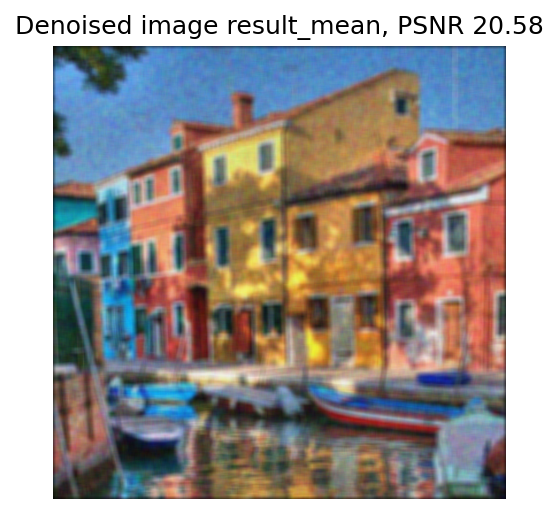

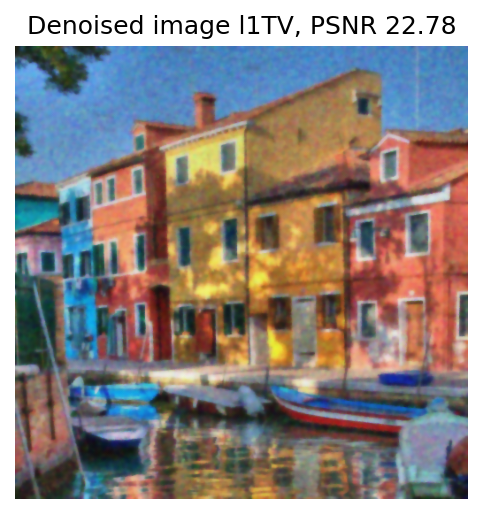

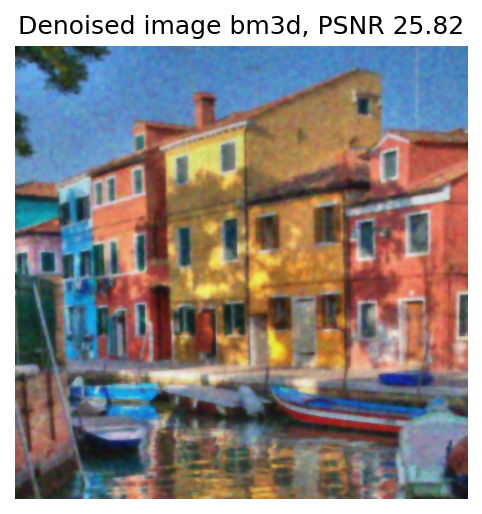

In [8]:

size = 7
result_median = median_filter(image_noisy_G, size=size)
result_mean = mean_filter(image_noisy_G, size=size)

fig = plt.figure(dpi=150)
plt.imshow(result_median)
plt.axis('off')
plt.title(f'Denoised image result_median, PSNR {psnr(image, result_median):.2f}')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(result_mean)
plt.axis('off')
plt.title(f'Denoised image result_mean, PSNR {psnr(image, result_mean):.2f}')
plt.show()

tv = denoise_tv_chambolle(image_noisy_G, weight=0.3, multichannel=True)
fig = plt.figure(dpi=150)
plt.imshow((tv * 255).astype(np.uint8))
plt.axis('off')
plt.title(f'Denoised image l1TV, PSNR {psnr(image, (tv * 255).astype(np.uint8)):.2f}')
plt.show()

bm3d = bm3d.bm3d(image_noisy_G,sigma_psd=40/255.)
fig = plt.figure(dpi=150)
plt.imshow((tv * 255).astype(np.uint8))
plt.axis('off')
plt.title(f'Denoised image bm3d, PSNR {psnr(image, (bm3d * 255).astype(np.uint8)):.2f}')
plt.show()
